In [1]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import utility as ut
import re

In [2]:
animals = pd.read_csv('./data/animals_checked.tsv', sep='\t')
animal_code = pd.read_csv('./data/animal_code.tsv', sep='\t', header=None)
animal_dict = {row[0]:row[1] for i,row in animal_code.iterrows()}
alternatives = pd.read_csv('./data/alternatives_checked.tsv', sep='\t')
categories = {row['atu_id'] :[row['category']] for i,row in pd.read_csv('data/categories_atu.tsv', sep='\t').iterrows()}

## Analysis
### Basic statistics

In [3]:
# Frequency of animals

result = Counter()
for x in animals['animals']:
    if type(x) == str:
        result = result + Counter([w.strip() for w in x.split(',')])

freq_raw = pd.DataFrame.from_dict(result, orient='index').sort_values(0,ascending=False)

In [4]:
freq_raw

,0
fox,136
wolf,118
bear,72
man,58
bird,56
dog,51
cat,42
lion,41
jackal,36
hare,36


In [5]:
# Frequency of animals after unifying some categories

result = Counter()
for x in animals['animals']:
    if type(x) == str:
        result = result + Counter([animal_dict.get(w.strip()) for w in x.split(',')])

freq_coded = pd.DataFrame.from_dict(result, orient='index').sort_values(0,ascending=False)

In [6]:
freq_coded

,0
fox,136
wolf,118
human,113
*bird,91
bear,72
dog,55
rabbit,49
lion,43
chicken,43
cat,42


## Co-occurrence analysis

In [7]:
# Co-occurrence analysis

def count_animals(data, filter=True):
    code = {animal_code.loc[i][0]: animal_code.loc[i][1] for i in animal_code.index}
    result = Counter()
    for row in data.values:
        if type(row) == str:
            if filter:
                x = [code[w] for w in row.split(', ') if code.get(w, None)]
            else:
                x = [w for w in row.split(', ')]
            result = result + Counter(ut.make_couples(x, 1))
    return result 

def count_alternatives(data, filter=True):
    code = {animal_code.loc[i][0]: animal_code.loc[i][1] for i in animal_code.index}
    result = Counter()
    for row in data.values:
        row_evaled = eval(row)
        if len(row_evaled):
            for i in row_evaled:
                if filter:
                    x = [code[w] for w in i if code.get(w)]
                else:
                    x = [w for w in i]
    return result 

In [8]:
# co-occurence before unifying categories

raw_counts = count_animals(animals['animals'], False)
alt_counts = count_alternatives(alternatives['alternatives'], False)
counts = raw_counts - alt_counts
result = pd.DataFrame.from_dict(counts, orient='index')
result.sort_values(0, ascending=False)

,0
"(fox, wolf)",67
"(bear, wolf)",47
"(bear, fox)",44
"(fox, jackal)",32
"(fox, hare)",27
"(dog, wolf)",22
"(dog, fox)",21
"(fox, lion)",21
"(bear, man)",20
"(jackal, wolf)",20


In [9]:
# after unifying animal categories

raw_counts = count_animals(animals['animals'])
alt_counts = count_alternatives(alternatives['alternatives'])
counts = raw_counts - alt_counts
result = pd.DataFrame.from_dict(counts, orient='index')
result = result.sort_values(0, ascending=False)
result.columns = ['Weight']
result['Source'] = [x[0] for x in result.index]
result['Target'] = [x[1] for x in result.index]
result =  result.sort_values(['Weight', 'Target', 'Source'], ascending=False)
result = result[['Source', 'Target', 'Weight']]
result.to_csv('result/cooc_gephi.tsv', sep='\t', index=None)

## Motif analysis

In [10]:
# frequency of motifs

def get_motif():
    motif = pd.read_csv('data/motifs_checked.tsv', sep='\t')
    motif_list = motif['motif'].apply(lambda x:x.split(','))
    
    # remove motifs with 'cf.''
    motif_list = motif_list.apply(lambda x: [w for w in x if not re.match('cf.', w)])
    
    # single alphabet e.g. 'K'.
    motif['major'] = motif_list.apply(lambda x: [w[0] for w in x])
    
    # alphabet with number e.g. 'J14'
    motif['minor'] = motif_list.apply(lambda x: [w.split('.')[0] for w in x])
    
    # ATU index
    motif['_id'] = [motif.iloc[x, 1] for x in range(len(motif))]
    
    id_list = list(set(motif['_id']))
    id_list.sort()
    
    minor = {}
    result = {}
    for tale_id in id_list:
        minor[tale_id] = motif[motif['_id'] == tale_id]['minor'].tolist()[0]
        result[tale_id] = [x[0] for x in list(set(minor[tale_id]))]
    return result


In [11]:
motifs = get_motif()

res = Counter()
for i in motifs.values():
    res = res + Counter(i)

motif_freq = pd.DataFrame.from_dict(res, orient='index')[0].sort_values(ascending=False)


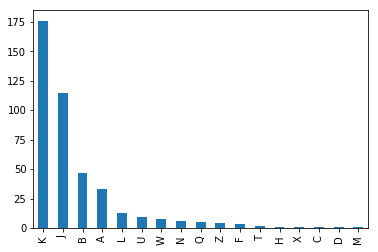

In [12]:
# figure
motif_freq.plot(kind='bar')

In [13]:
## frequency of motifs by animal category

res = {}
for i in list(motifs.keys()):
    if categories.get(i):
        if res.get(categories[i][0], None):
            res[categories[i][0]] = res[categories[i][0]] + Counter(motifs.get(i, []))
        else:
            res[categories[i][0]] = Counter(motifs.get(i, []))
    else:
        print(i)


In [14]:
# calculate relative frequency

df = pd.DataFrame.from_dict(res, orient='index')
df = df.fillna(0)
df = df.T
df = df.sort_index()

df = df / df.sum()

df['means'] = [df.loc[x].mean() for x in df.index]

result = {}
for i in df.columns:
    if i == 'means':
        continue
    result[i] = df[i] - df['means']

freq = pd.DataFrame.from_dict(result, orient='index')
freq = freq.T
freq = freq[['wild', 'wild_and_domestic', 'wild_and_human','domestic', 'others']]

freq.columns = ['Wild', 'Wild and Domestic', 'Wild and Human','Domestic', 'Others']

In [15]:
freq.to_csv('result/pca_tale_type.tsv', sep='\t') ## for PCA
freq

,Wild,Wild and Domestic,Wild and Human,Domestic,Others
A,-0.030364,-0.076116,-0.043858,0.048884,0.101454
B,-0.066671,-0.040834,0.155235,-0.068959,0.021228
C,-0.003226,-0.003226,0.012903,-0.003226,-0.003226
D,-0.005000,-0.005000,-0.005000,0.020000,-0.005000
F,-0.009994,0.005631,-0.009994,0.015006,-0.000648
H,0.005229,-0.001307,-0.001307,-0.001307,-0.001307
J,-0.098816,-0.035806,-0.027237,0.173569,-0.011711
K,0.259326,0.154036,-0.055137,-0.211589,-0.146636
L,-0.016365,-0.029437,-0.029437,0.020563,0.054675
M,-0.003125,0.012500,-0.003125,-0.003125,-0.003125


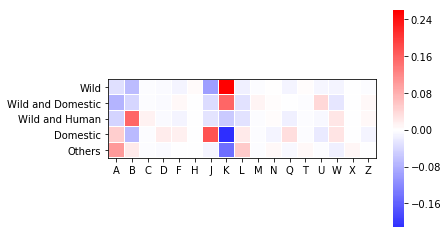

In [16]:
# figure

ax = sns.heatmap(freq.T, cmap='bwr', linewidths=.01, square=True, center=0)
for _, spine in ax.spines.items():
    spine.set_visible(True)

In [17]:
df_animal = { x['atu_id'] : list(set([animal_dict.get(animal.strip(),'NA') for animal in x['animals'].split(',')])) if type(x['animals']) != float else [] for i,x in animals.iterrows() }

In [18]:
animal_motif = ut.result_freq_by_index(df_animal, motifs, filename=None)

In [19]:
animal_motif.to_csv('result/pca_animal.tsv', sep='\t')
animal_motif

,fox,wolf,human,bear,*bird,dog,rabbit,cat,lion,sheep,...,*large animal,heron,ant,swallow,stork,lark,coyote,crayfish,wren,owl
index,,,,,,,,,,,,,,,,,,,,,
A,5.0,3.0,4.0,4.0,15.0,8.0,6.0,3.0,1.0,1.0,...,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0
B,8.0,8.0,23.0,15.0,11.0,7.0,3.0,10.0,12.0,0.0,...,1.0,0.0,4.0,0.0,0.0,2.0,0.0,1.0,3.0,1.0
C,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
H,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J,39.0,27.0,28.0,19.0,19.0,15.0,7.0,11.0,17.0,9.0,...,1.0,4.0,2.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0
K,115.0,86.0,38.0,43.0,36.0,29.0,34.0,20.0,21.0,21.0,...,3.0,2.0,1.0,2.0,1.0,3.0,7.0,2.0,3.0,2.0
L,0.0,1.0,6.0,1.0,3.0,1.0,0.0,0.0,3.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
